<ipython-input-10-5e1c57c465c3>:39: RuntimeWarning: divide by zero encountered in scalar divide
  mean2 = np.sum(bin_edges[t2:-1] * hist[t2:]) / p2
<ipython-input-10-5e1c57c465c3>:41: RuntimeWarning: invalid value encountered in scalar multiply
  variance = p0 * p1 * p2 * ((mean0 - mean1) ** 2 + (mean1 - mean2) ** 2 + (mean0 - mean2) ** 2)


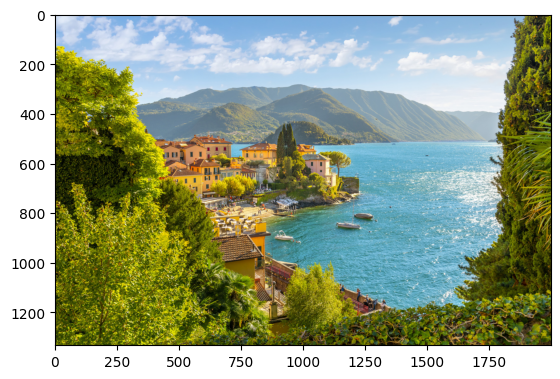

Optimal thresholds: (89, 177)


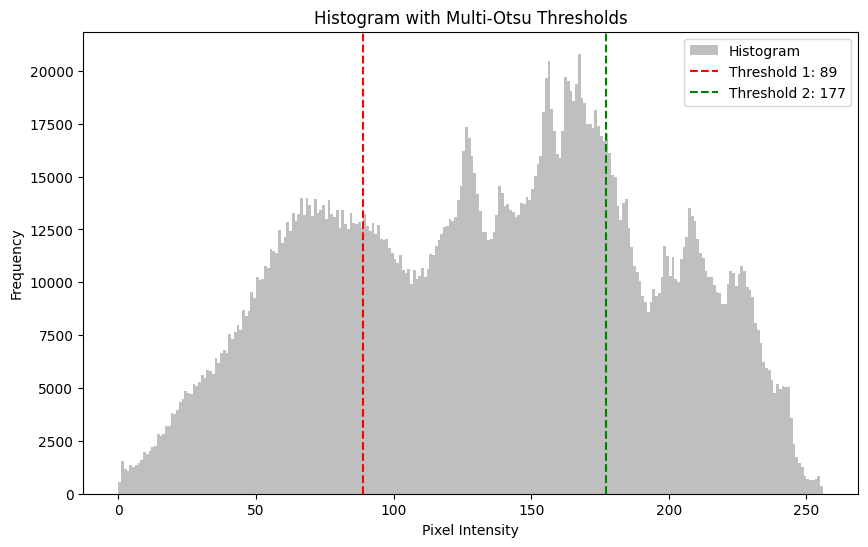

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests

# Load the image (convert to grayscale)
url = 'https://images.ctfassets.net/i3kf1olze1gn/3SMf6PdtYk4Hf8YfaOi75c/12148d870e520297c77bd41e0bf2c65f/Varenna_lake_como.jpg'
im = Image.open(requests.get(url, stream=True).raw)

image = im.convert('L')
image = np.array(image)

# Calculate histogram
hist, bin_edges = np.histogram(image, bins=256, range=(0, 256))

# Normalize the histogram
hist = hist / hist.sum()

# Compute cumulative sum of the histogram
cumsum = np.cumsum(hist)

# Initialize variables for the optimal thresholds
max_variance = 0
thresholds = (0, 0)

# Iterate over all possible thresholds
for t1 in range(1, 256):
    for t2 in range(t1 + 1, 256):

        # Calculate class probabilities
        p0 = cumsum[t1]
        p1 = cumsum[t2] - cumsum[t1]
        p2 = 1 - cumsum[t2]

        # Calculate class means
        mean0 = np.sum(bin_edges[:t1] * hist[:t1]) / p0
        mean1 = np.sum(bin_edges[t1:t2] * hist[t1:t2]) / p1
       # Use bin_edges[t2:-1] to ensure the same length as hist[t2:]
        mean2 = np.sum(bin_edges[t2:-1] * hist[t2:]) / p2
        # Calculate between-class variance
        variance = p0 * p1 * p2 * ((mean0 - mean1) ** 2 + (mean1 - mean2) ** 2 + (mean0 - mean2) ** 2)

        # Check if new maximum variance is found
        if variance > max_variance:
            max_variance = variance
            thresholds = (t1, t2)

#show the image
plt.imshow(im)
plt.show()

# Print the thresholds
print(f"Optimal thresholds: {thresholds}")

# Plot the histogram and thresholds
plt.figure(figsize=(10, 6))
plt.hist(image.ravel(), bins=256, range=(0, 256), alpha=0.5, color='gray', label='Histogram')
plt.axvline(thresholds[0], color='r', linestyle='--', label=f'Threshold 1: {thresholds[0]}')
plt.axvline(thresholds[1], color='g', linestyle='--', label=f'Threshold 2: {thresholds[1]}')
plt.title('Histogram with Multi-Otsu Thresholds')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()
